In [54]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import sys
sys.path.append('/Users/zhengj10/Python/Modules')
import os
import PatcherBot as pb
from glob import glob
from skimage.io import imread
from scipy.signal import butter,lfilter,filtfilt
import pandas as pd

In [55]:
def low_pass(trace, cut = 0.125):
    b, a = butter(8, 0.06)
    y = filtfilt(b, a, trace, padlen=150)
    return y

# def butter_lowpass(cutoff, fs, order=5):
#     return butter(order, cutoff, fs=fs, btype='low', analog=False)

# def butter_lowpass_filter(data, cutoff, fs, order=5):
#     b, a = butter_lowpass(cutoff, fs, order=order)
#     y = lfilter(b, a, data)
#     return y

In [12]:
def get_cell_cap(logFile):
    key_phrase = 'whole cell'
    with open(logFile) as f:
        f = f.readlines()
    for idx,line in enumerate(f):
        if key_phrase in line:
            print(f[idx+4])
            break
    measurement = eval(f[idx+4])
    cell_cap = measurement['capacitance']
    return(cell_cap)

In [13]:
imgPath = '/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/raw'
date = '2022.04.14_000'
plates = ['plate_001','plate_002']
# plates = ['plate_002']

In [14]:
bad_trial = {
    'plate_001':[],
    'plate_002':['patch_attempt_0031_000','patch_attempt_0038_000','patch_attempt_0043_000']
}

### Create dataframe
- dataframe contains meta and raw current and voltage traces

In [15]:
df = pd.DataFrame()

In [16]:
# Filter requirements:
order = 6
fs = 40000.0     # sample rate, Hz
cutoff = 1000.0  # desired cutoff frequency of the filter, Hz

In [17]:
Date = []
Plate = []
Mutation = []
Cell = []
Exp_type = []
Clamp_data = []

for plate in plates:
    cellPath = pb.getPathInfo(os.path.join(imgPath,date,plate))
    for cell in cellPath:
        if cell in bad_trial[plate]:
            continue
        dataFile = os.path.join(imgPath,date,plate,cell,'opto_stim_long_pulses_000/000/Clamp1.ma')
        if not os.path.exists(dataFile):
            continue
        data = h5py.File(dataFile,'r')
        data = data['data'][()]
        data = data[0,:]
        data = butter_lowpass_filter(data, cutoff, fs, order)
        Date.append(date)
        Plate.append(plate)
        Mutation.append('345.1:(pGP-ACAGW-ChR2-Venus-AAV)')
        Cell.append(cell)
        if plate=='plate_001':
            Exp_type.append('VC')
        else:
            Exp_type.append('IC')
        Clamp_data.append(data)
        print(plate,cell)
        

plate_001 patch_attempt_0018_000
plate_001 patch_attempt_0020_000
plate_001 patch_attempt_0021_000
plate_001 patch_attempt_0022_000
plate_001 patch_attempt_0023_000
plate_001 patch_attempt_0025_000
plate_002 patch_attempt_0028_000
plate_002 patch_attempt_0032_000
plate_002 patch_attempt_0033_000
plate_002 patch_attempt_0040_000
plate_002 patch_attempt_0041_000
plate_002 patch_attempt_0044_000
plate_002 patch_attempt_0045_000
plate_002 patch_attempt_0046_000


In [18]:
df['Date'] = Date
df['Plate'] = Plate
df['Mutation'] = Mutation
df['Cell'] = Cell
df['Exp_type'] = Exp_type
df['Clamp_data'] = Clamp_data

### Plot

In [19]:
sample_rate = 40000
delay = int(2.0*sample_rate)
pulse_width = int(0.4*sample_rate)
period = int(5.5*sample_rate)
blue_pulse_start = int(22.6*sample_rate) # 1st blue pulse
# pulses_start_time = []
# for p in range(4):
#     pulses_start_time.append(p*period+delay)
# print(pulses_start_time)

# [0,2,2,2.4,2.4,7.5,7.5,7.9,7.9,13,13,13.4,13.4,18.5,18.5,18.9,18.9,25.4,25.4,25.8,25.8,30]


#### 1. All Clamp data (current and voltage traces)

plate_001 patch_attempt_0018_000
plate_001 patch_attempt_0020_000
plate_001 patch_attempt_0021_000
plate_001 patch_attempt_0022_000
plate_001 patch_attempt_0023_000
plate_001 patch_attempt_0025_000
plate_002 patch_attempt_0028_000
plate_002 patch_attempt_0032_000
plate_002 patch_attempt_0033_000
plate_002 patch_attempt_0040_000
plate_002 patch_attempt_0041_000
plate_002 patch_attempt_0044_000
plate_002 patch_attempt_0045_000
plate_002 patch_attempt_0046_000


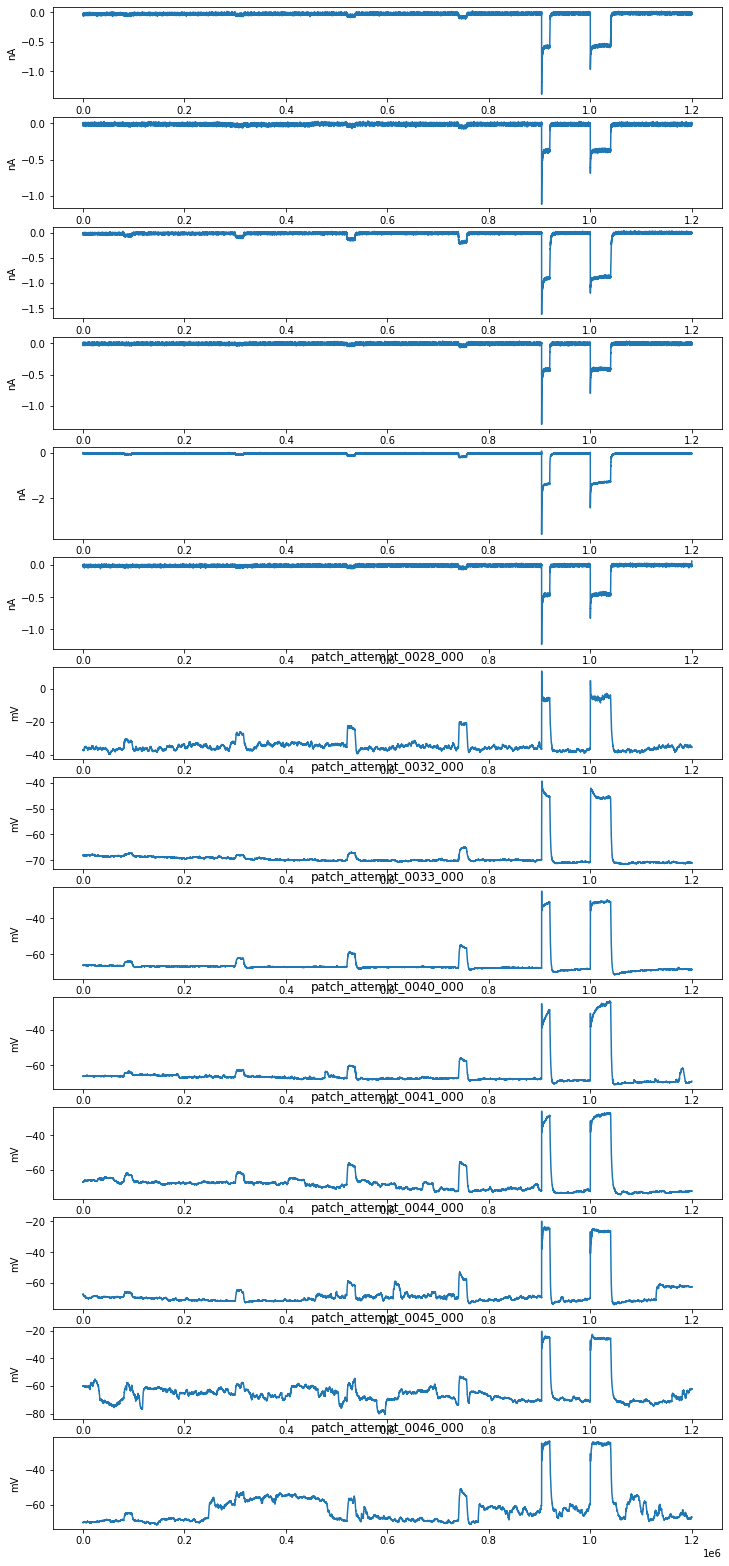

In [24]:
plt.figure(figsize=[12,len(df)*2])

i=1
for idx,r in df.iterrows():
    ax = plt.subplot(len(df),1,i)
    print(r['Plate'],r['Cell'])
    if r['Plate'] == 'plate_001':
        ax.plot(r['Clamp_data']*1e9)
        ax.set_ylabel('nA')
    else:
        ax.plot(r['Clamp_data']*1e3)
        ax.set_ylabel('mV')
        ax.set_title(r['Cell'])
        
    i+=1


plate_001 patch_attempt_0018_000
plate_001 patch_attempt_0020_000
plate_001 patch_attempt_0021_000
plate_001 patch_attempt_0022_000
plate_001 patch_attempt_0023_000
plate_001 patch_attempt_0025_000
plate_002 patch_attempt_0028_000
plate_002 patch_attempt_0032_000
plate_002 patch_attempt_0033_000
plate_002 patch_attempt_0040_000
plate_002 patch_attempt_0041_000
plate_002 patch_attempt_0044_000
plate_002 patch_attempt_0045_000
plate_002 patch_attempt_0046_000


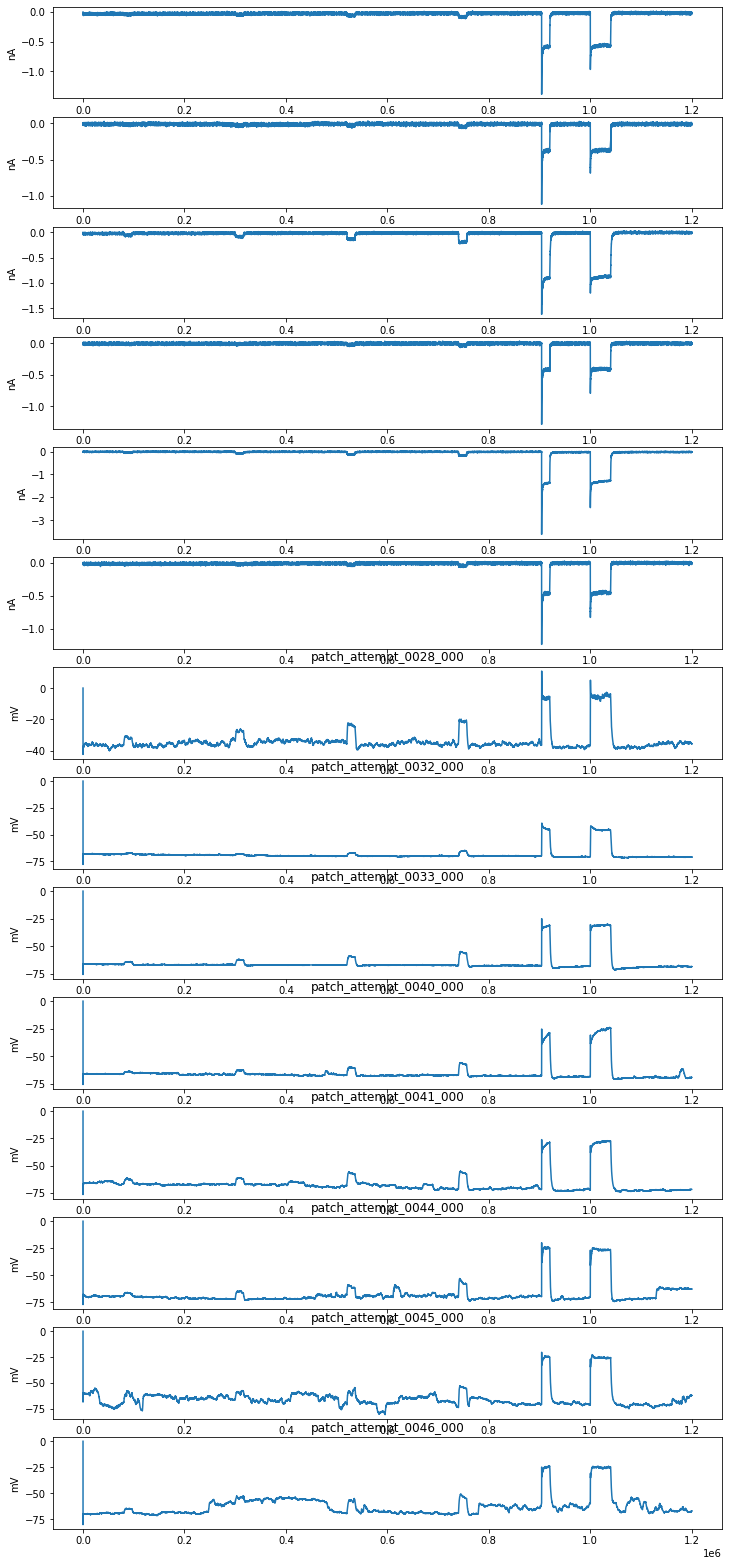

In [20]:
plt.figure(figsize=[12,len(df)*2])

i=1
for idx,r in df.iterrows():
    ax = plt.subplot(len(df),1,i)
    print(r['Plate'],r['Cell'])
    if r['Plate'] == 'plate_001':
        ax.plot(r['Clamp_data']*1e9)
        ax.set_ylabel('nA')
    else:
        ax.plot(r['Clamp_data']*1e3)
        ax.set_ylabel('mV')
        ax.set_title(r['Cell'])
        
    i+=1



# plt.figure(figsize=[12,3])
# plt.plot(df.loc[0,'Clamp_data'])

#### 2. Yellow light response (raw and normalized to blue light response)

- Calculate the response

In [ ]:
# df_sel = df[df['Plate']=='plate_001']
Yellow_light_response = []
Blue_light_response = []
Yellow_light_response_norm = []
for i,r in df.iterrows():
    y_individual = []
    y_to_b_individual = []
    y_to_b_ratio = []
    
    bln = np.mean(r['Clamp_data'][blue_pulse_start-50:blue_pulse_start])
    if r['Plate']=='plate_001':
        peak = np.min(r['Clamp_data'][blue_pulse_start:blue_pulse_start+pulse_width])
    else:
        peak = np.max(r['Clamp_data'][blue_pulse_start:blue_pulse_start+pulse_width])
    blue_light_response = peak-bln

    
    for p in range(4):
        pulse_start = p*period+delay
        bln = np.mean(r['Clamp_data'][pulse_start-50:pulse_start])
        if r['Plate']=='plate_001':
            peak = np.min(r['Clamp_data'][pulse_start:pulse_start+pulse_width])
        else:
            peak = np.max(r['Clamp_data'][pulse_start:pulse_start+pulse_width])
        yellow_light_response = peak-bln
        y_individual.append(yellow_light_response)
        y_to_b_ratio.append(yellow_light_response/blue_light_response)
                          
        
    Yellow_light_response.append(y_individual)
    Blue_light_response.append(blue_light_response)
    Yellow_light_response_norm.append(y_to_b_ratio)
#     print(Yellow_light_response,Blue_light_response)


In [ ]:
df['Yellow_light_response'] = Yellow_light_response
df['Blue_light_response'] = Blue_light_response
df['Yellow_light_response_norm_to_blue_light'] = Yellow_light_response_norm

#### Plot from pickle file directly

In [ ]:
# df = pd.read_pickle('/Users/zhengj10/Desktop/ChR2.pkl')
import pandas as pd
df = pd.read_pickle('/Volumes/genie/Jihong_GENIE_stuff/Manuscript/Voltron 2/Revision/Addtional experiments/ChR2.pkl')

In [50]:
# df_p = df[df['Plate']=='plate_001'] #VC
df_p = df[df['Plate']=='plate_002'] #IC
# df_p

- Plot yellow light response 

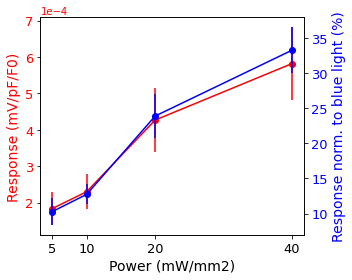

In [130]:
# sns.set_style('whitegrid')

plt.figure(figsize=[5,4])

x = [5,10,20,40]
# mean_raw = np.mean(df_p['Yellow_light_response'].to_list(),axis=0)*1e12
# sem_raw = np.std(df_p['Yellow_light_response'].to_list(),axis=0)*1e12/np.sqrt(len(df_p))

# ## For VC
# mean_raw = np.mean(df_p['Yellow_light_response_norm_to_Cm_F0'].to_list(),axis=0)
# sem_raw = np.std(df_p['Yellow_light_response_norm_to_Cm_F0'].to_list(),axis=0)/np.sqrt(len(df_p))

## For IC
mean_raw = np.mean(df_p['Yellow_light_response_norm_to_Cm_F0'].to_list(),axis=0)/-1e9 # *1-e9: converted to mV/pF
sem_raw = np.std(df_p['Yellow_light_response_norm_to_Cm_F0'].to_list(),axis=0)/-1e9/np.sqrt(len(df_p))

mean_norm = np.mean(df_p['Yellow_light_response_norm_to_blue_light'].to_list(),axis=0)*100
sem_norm = np.std(df_p['Yellow_light_response_norm_to_blue_light'].to_list(),axis=0)*100/np.sqrt(len(df_p))

# fig, ax1 = plt.subplots()
ax1 = plt.subplot(111)
  
ax1.set_xlabel('Power (mW/mm2)',size=14) 
ax1.set_ylabel('Response (mV/pF/F0)', color = 'red',size=14) 
ax1.errorbar(x,mean_raw,yerr=sem_raw,fmt='o-',color = 'red') 
ax1.tick_params(axis ='y', labelcolor = 'red') 
ax1.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.tick_params(labelsize=13)

ax2 = ax1.twinx() 
  
ax2.set_ylabel('Response norm. to blue light (%)', color = 'blue',size=14) 
ax2.errorbar(x, mean_norm,yerr=sem_norm,fmt='o-',color = 'blue') 
ax2.tick_params(axis ='y', labelcolor = 'blue')

positions = x
labels = x

plt.xticks(positions,labels)
plt.tick_params(labelsize=13)
plt.tight_layout()
# plt.savefig('/Volumes/genie/Jihong_GENIE_stuff/Manuscript/Voltron 2/Revision/Addtional experiments/Y_response_IC.png',dpi=1200)
# plt.savefig('/Volumes/genie/Jihong_GENIE_stuff/Manuscript/Voltron 2/Revision/Addtional experiments/Y_response_IC.pdf',format='pdf')

plt.savefig('/Volumes/genie/Presentations/Jihong/GENIE production/220426/ChR2_IC_norm_response.pdf',format='pdf')
plt.savefig('/Volumes/genie/Presentations/Jihong/GENIE production/220426/ChR2_IC_norm_response.png',dpi=1200)

# plt.savefig('/Users/zhengj10/Desktop/For ilya/VC.png')

plt.show()

In [131]:
# df
df.Mutation.unique()

array(['345.1:(pGP-ACAGW-ChR2-Venus-AAV)'], dtype=object)

#### Check data from individual channel (e.g. camera exposure signal)

In [ ]:
# dataFile = r'Y:\PatcherBot\raw\2022.04.14_000\plate_001\patch_attempt_0018_000\opto_stim_long_pulses_000\000\Clamp1.ma'
# dataFile = r'Y:\PatcherBot\raw\2022.04.14_000\plate_001\patch_attempt_0018_000\opto_stim_long_pulses_000\000\LED_Ext_2.ma'
# dataFile = '/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/raw/2022.04.14_000/plate_003/patch_attempt_0048_000/camera_clamp1_000/000/Camera/daqResult.ma'

In [ ]:
# # i=0
# s = 2000
# plt.figure(figsize=[12,3])
# data = h5py.File(dataFile,'r')
# data = data['data'][()]
# data = data[0,:]
# data_d = np.diff(data)
# peaks,_ = signal.find_peaks(data_d,height=3)
# ax4 = plt.subplot(111)
# # x = np.arange(data.shape[0]-1)/40.0
# ax4.plot(data_d,color='k',alpha=0.6)
# ax4.scatter(peaks,data_d[peaks],color='m')
# ax4.set_xlim(i,i+s)
# i+=2000
# plt.tight_layout()
# plt.show()

In [ ]:
# peaks.shape

#### 2. Images acquired before each recording in 1

- Plot mask
- Add F0 to df

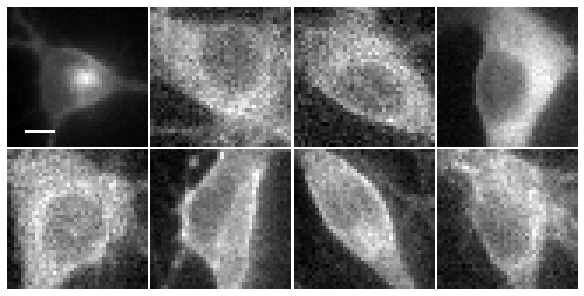

In [42]:
plt.figure(figsize=[8,4])

F0 = []
i=1
for idx,r in df_p.iterrows():

    dataFile = glob(os.path.join(imgPath,r['Date'],r['Plate'],r['Cell'])+'/image_*.tif')
    dataFile = dataFile[0]
    data = imread(dataFile)[236:276,236:276]
    thre = sorted(np.ndarray.flatten(data))[800]
    mask = data>thre
    
    f0 = np.sum(mask*data)/np.sum(mask)
    fb = np.min(data)
    F0.append(f0-fb)
    
    ax = plt.subplot(2,4,i)
    vmax = np.min(data)+(np.max(data)-np.min(data))/3
    ax.imshow(data,cmap='gray')
#     ax.imshow(mask,cmap='gray')
    ax.axis('off')
#     if idx == 0: # VC
    if idx == 6: # IC
        ax.plot([5,12.69],[35,35],color='w',lw=3)
#     print(r['Plate'],r['Cell'])
    i+=1

plt.tight_layout(pad=0.3)
plt.savefig('/Volumes/genie/Presentations/Jihong/GENIE production/220426/ChR2_IC_images.pdf',format='pdf')
plt.savefig('/Volumes/genie/Presentations/Jihong/GENIE production/220426/ChR2_IC_images.png',dpi=1200)

# plt.savefig('/Volumes/genie/Jihong_GENIE_stuff/Manuscript/Voltron 2/Revision/Addtional experiments/image.png',dpi=1200)
# plt.savefig('/Volumes/genie/Jihong_GENIE_stuff/Manuscript/Voltron 2/Revision/Addtional experiments/image.pdf',format='pdf')
plt.show()

In [33]:
# df['F0_bkg_rmd'] = F0
df_p
# df.columns

,Date,Plate,Mutation,Cell,Exp_type,Clamp_data,Yellow_light_response,Blue_light_response,Yellow_light_response_norm_to_blue_light,F0_bkg_rmd,Yellow_light_response_norm_to_Cm_F0,Cm
0,2022.04.14_000,plate_001,345.1:(pGP-ACAGW-ChR2-Venus-AAV),patch_attempt_0018_000,VC,"[-5.596465284772651e-11, -5.318774157142193e-1...","[-4.0229218254155386e-11, -5.3288072123937967e...",-1.372231e-09,"[0.029316657781029824, 0.038833172556291415, 0...",312.575720,"[0.0026563385703416756, 0.0035186157590160047,...",-4.845102e-11
1,2022.04.14_000,plate_001,345.1:(pGP-ACAGW-ChR2-Venus-AAV),patch_attempt_0020_000,VC,"[-3.1166949693088855e-11, -2.804859109556828e-...","[-3.9039662183956606e-11, -4.59716629359794e-1...",-1.118819e-09,"[0.03489363477422592, 0.04108945433219189, 0.0...",228.701511,"[0.004222220154671923, 0.004971930363471309, 0...",-4.042929e-11
2,2022.04.14_000,plate_001,345.1:(pGP-ACAGW-ChR2-Venus-AAV),patch_attempt_0021_000,VC,"[-5.7358917651758904e-12, -1.0382973353678299e...","[-6.818950629783205e-11, -1.0793181556768442e-...",-1.609404e-09,"[0.042369426544313846, 0.06706323860911755, 0....",840.298620,"[0.0009345959949261477, 0.0014792986198504349,...",-8.682804e-11
3,2022.04.14_000,plate_001,345.1:(pGP-ACAGW-ChR2-Venus-AAV),patch_attempt_0022_000,VC,"[-2.799076273050676e-11, -2.5437574060506446e-...","[-4.6317575119431126e-11, -3.76047451648068e-1...",-1.290020e-09,"[0.0359045318660324, 0.02915050642444808, 0.03...",263.452261,"[0.002220297428546121, 0.0018026357980801433, ...",-7.918314e-11
4,2022.04.14_000,plate_001,345.1:(pGP-ACAGW-ChR2-Venus-AAV),patch_attempt_0023_000,VC,"[-4.376649359811226e-11, -3.954848006588259e-1...","[-6.70088830985487e-11, -9.252149365537976e-11...",-3.596103e-09,"[0.018633750025610102, 0.025728266239491416, 0...",3081.304130,"[0.001090037726057194, 0.00150505297047265, 0....",-1.995061e-11
5,2022.04.14_000,plate_001,345.1:(pGP-ACAGW-ChR2-Venus-AAV),patch_attempt_0025_000,VC,"[-1.763412957721805e-11, -1.711213652139453e-1...","[-3.704330246283028e-11, -3.990738908648029e-1...",-1.234479e-09,"[0.030007243208681447, 0.0323273210141858, 0.0...",431.136421,"[0.0011213258605389468, 0.0012080237029126113,...",-7.662371e-11


- Plot images

In [26]:
df

,Date,Plate,Mutation,Cell,Exp_type,Clamp_data,Yellow_light_response,Blue_light_response,Yellow_light_response_norm_to_blue_light,F0_bkg_rmd,Yellow_light_response_norm_to_Cm_F0,Cm
0,2022.04.14_000,plate_001,345.1:(pGP-ACAGW-ChR2-Venus-AAV),patch_attempt_0018_000,VC,"[-5.596465284772651e-11, -5.318774157142193e-1...","[-4.0229218254155386e-11, -5.3288072123937967e...",-1.372231e-09,"[0.029316657781029824, 0.038833172556291415, 0...",312.575720,"[0.0026563385703416756, 0.0035186157590160047,...",-4.845102e-11
1,2022.04.14_000,plate_001,345.1:(pGP-ACAGW-ChR2-Venus-AAV),patch_attempt_0020_000,VC,"[-3.1166949693088855e-11, -2.804859109556828e-...","[-3.9039662183956606e-11, -4.59716629359794e-1...",-1.118819e-09,"[0.03489363477422592, 0.04108945433219189, 0.0...",228.701511,"[0.004222220154671923, 0.004971930363471309, 0...",-4.042929e-11
2,2022.04.14_000,plate_001,345.1:(pGP-ACAGW-ChR2-Venus-AAV),patch_attempt_0021_000,VC,"[-5.7358917651758904e-12, -1.0382973353678299e...","[-6.818950629783205e-11, -1.0793181556768442e-...",-1.609404e-09,"[0.042369426544313846, 0.06706323860911755, 0....",840.298620,"[0.0009345959949261477, 0.0014792986198504349,...",-8.682804e-11
3,2022.04.14_000,plate_001,345.1:(pGP-ACAGW-ChR2-Venus-AAV),patch_attempt_0022_000,VC,"[-2.799076273050676e-11, -2.5437574060506446e-...","[-4.6317575119431126e-11, -3.76047451648068e-1...",-1.290020e-09,"[0.0359045318660324, 0.02915050642444808, 0.03...",263.452261,"[0.002220297428546121, 0.0018026357980801433, ...",-7.918314e-11
4,2022.04.14_000,plate_001,345.1:(pGP-ACAGW-ChR2-Venus-AAV),patch_attempt_0023_000,VC,"[-4.376649359811226e-11, -3.954848006588259e-1...","[-6.70088830985487e-11, -9.252149365537976e-11...",-3.596103e-09,"[0.018633750025610102, 0.025728266239491416, 0...",3081.304130,"[0.001090037726057194, 0.00150505297047265, 0....",-1.995061e-11
5,2022.04.14_000,plate_001,345.1:(pGP-ACAGW-ChR2-Venus-AAV),patch_attempt_0025_000,VC,"[-1.763412957721805e-11, -1.711213652139453e-1...","[-3.704330246283028e-11, -3.990738908648029e-1...",-1.234479e-09,"[0.030007243208681447, 0.0323273210141858, 0.0...",431.136421,"[0.0011213258605389468, 0.0012080237029126113,...",-7.662371e-11
6,2022.04.14_000,plate_002,345.1:(pGP-ACAGW-ChR2-Venus-AAV),patch_attempt_0028_000,IC,"[-0.03691448379067075, -0.036922736356394786, ...","[0.005756793677296073, 0.0075262834332290515, ...",4.722495e-02,"[0.12190153241625082, 0.15937091640577783, 0.2...",1557.840852,"[-392768.79697011854, -513495.7852291769, -894...",-9.408505e-12
7,2022.04.14_000,plate_002,345.1:(pGP-ACAGW-ChR2-Venus-AAV),patch_attempt_0032_000,IC,"[-0.0681757842355816, -0.06818438398081658, -0...","[0.0013906938692850174, 0.00139424552745597, 0...",3.055949e-02,"[0.04550775820041138, 0.04562397932198527, 0.1...",267.770677,"[-81011.5401388311, -81218.43347807007, -18039...",-6.410939e-11
8,2022.04.14_000,plate_002,345.1:(pGP-ACAGW-ChR2-Venus-AAV),patch_attempt_0033_000,IC,"[-0.06616145322120388, -0.06616462190929748, -...","[0.0025486668382606603, 0.004643488268400775, ...",4.286749e-02,"[0.05945453747773818, 0.10832190505899156, 0.1...",211.126884,"[-143385.8956686767, -261238.82274311729, -460...",-8.419050e-11
9,2022.04.14_000,plate_002,345.1:(pGP-ACAGW-ChR2-Venus-AAV),patch_attempt_0040_000,IC,"[-0.06617757111191273, -0.0661878585526872, -0...","[0.003056743106172502, 0.0038314073750231326, ...",4.242066e-02,"[0.07205789402018821, 0.09031938144232265, 0.1...",979.957340,"[-28262.467659178543, -35424.96809989323, -672...",-1.103676e-10


- Add Cm and normalized data to df

In [ ]:
Cm = []
Yellow_light_response_norm_to_Cm_F0 = []
for i,r in df.iterrows():
    logFile = os.path.join(imgPath,r['Date'],r['Plate'],r['Cell'])+'/patch.log'
    c_m = get_cell_cap(logFile)
    yellow_light_response_norm_to_Cm_F0 = np.array(r['Yellow_light_response'])/[r['F0_bkg_rmd']]/c_m
    Yellow_light_response_norm_to_Cm_F0.append(yellow_light_response_norm_to_Cm_F0)
    Cm.append(c_m)

In [ ]:
# df2.columns
df['Yellow_light_response_norm_to_Cm_F0'] = Yellow_light_response_norm_to_Cm_F0
df['Cm'] = Cm

In [ ]:
# df2 = df.rename({'Yellow_light_response_norm': 'Yellow_light_response_norm_to_blue_light'}, axis=1)

#### 3. Example recording

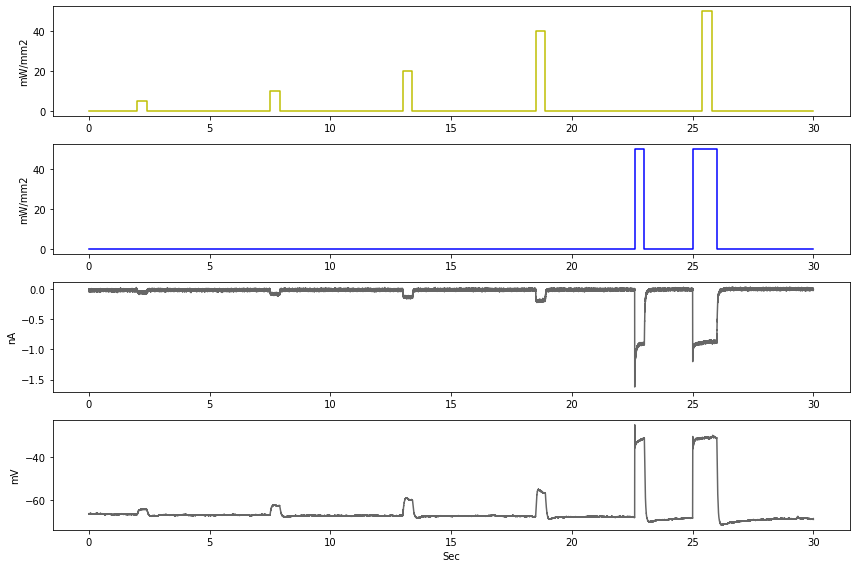

In [56]:

plt.figure(figsize=[12,8])

x = [0,2,2,2.4,2.4,7.5,7.5,7.9,7.9,13,13,13.4,13.4,18.5,18.5,18.9,18.9,25.4,25.4,25.8,25.8,30]
y = [0,0,5,5,0,0,10,10,0,0,20,20,0,0,40,40,0,0,50,50,0,0]
ax1 = plt.subplot(411)
ax1.plot(x,y,color='y')
ax1.set_ylabel('mW/mm2')

x = [0,22.6,22.6,23,23,25,25,26,26,30]
y = [0,0,50,50,0,0,50,50,0,0]
ax2 = plt.subplot(412)
ax2.plot(x,y,color='b')
ax2.set_ylabel('mW/mm2')

cell = 'patch_attempt_0021_000' #VC
# cell = 'patch_attempt_0033_000' #IC

dataFile = os.path.join(imgPath,date,'plate_001',cell,'opto_stim_long_pulses_000/000/Clamp1.ma')
data = h5py.File(dataFile,'r')
data = data['data'][()]
data = data[0,:]*1e9
data = low_pass(data)
ax3 = plt.subplot(413)
x = np.arange(data.shape[0])/40000
ax3.plot(x,data,color='k',alpha=0.6)
ax3.set_ylabel('nA')
# ax3.set_title('VC',size=16)

cell = 'patch_attempt_0033_000' #IC

dataFile = os.path.join(imgPath,date,'plate_002',cell,'opto_stim_long_pulses_000/000/Clamp1.ma')
data = h5py.File(dataFile,'r')
data = data['data'][()]
data = data[0,:]*1000
data = low_pass(data)
ax4 = plt.subplot(414)
x = np.arange(data.shape[0])/40000
ax4.plot(x,data,color='k',alpha=0.6)
ax4.set_ylabel('mV')
ax4.set_xlabel('Sec')
# ax4.set_title('IC',size=16)
plt.tight_layout()
# plt.savefig('/Volumes/genie/Jihong_GENIE_stuff/Manuscript/Voltron 2/Revision/Addtional experiments/example.png',dpi=1200)
# plt.savefig('/Volumes/genie/Jihong_GENIE_stuff/Manuscript/Voltron 2/Revision/Addtional experiments/example.pdf',format='pdf')

plt.show()

In [57]:
sample_rate = 40000
delay = int(2.0*sample_rate)
pulse_width = int(0.4*sample_rate)
period = int(5.5*sample_rate)
blue_pulse_start = int(22.6*sample_rate) # 1st blue pulse
# pulses_start_time = []
# for p in range(4):
#     pulses_start_time.append(p*period+delay)
# print(pulses_start_time)

# [0,2,2,2.4,2.4,7.5,7.5,7.9,7.9,13,13,13.4,13.4,18.5,18.5,18.9,18.9,25.4,25.4,25.8,25.8,30]

267998


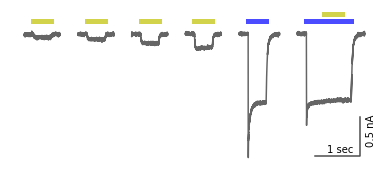

In [69]:
cell = 'patch_attempt_0021_000' #VC
# cell = 'patch_attempt_0033_000' #IC
space = 16000
height = 0.15 # VC
data = df.loc[2,'Clamp_data'] #VC

# height = -75 #IC
# data = df.loc[8,'Clamp_data'] #IC

plt.figure(figsize=[5.5,2.5])
ax = plt.subplot(111)
for p in range(4):

    data_p = data[p*period+delay-8000:p*period+delay+pulse_width+8000]*1e9 # 1e9 for VC, 1e3 for VC
    x = np.arange(data_p.shape[0])+data_p.shape[0]*p+space*p
    ax.plot(x,data_p,color='k',alpha=0.6)
    ax.plot([x[8000],x[8000]+16000],[height,height],color='y',lw=5,alpha=0.7)

data_p = data[blue_pulse_start-8000:blue_pulse_start+pulse_width+12000]*1e9 # 1e9 for VC, 1e9 for VC
# x = x+data_p.shape[0]+space
x = x[-1]+np.arange(data_p.shape[0])+space
ax.plot(x,data_p,color='k',alpha=0.6)
ax.plot([x[8000],x[8000]+16000],[height,height],color='b',lw=5,alpha=0.7)

data_p = data[25*sample_rate-8000:25*sample_rate+40000+12000]*1e9 # 1e9 for VC, 1e9 for VC
x = x[-1]+np.arange(data_p.shape[0])+space
ax.plot(x,data_p,color='k',alpha=0.6)
ax.plot([x[8000],x[8000]+40000],[height,height],color='b',lw=5,alpha=0.7)
ax.plot([x[24000],x[24000]+16000],[height+0.1,height+0.1],color='y',lw=5,alpha=0.7) # height+0.1 for VC, height-3 for IC
print(x[24000])
ax.axis('off')

## VC
ax.plot([300000-40000,300000,300000],[-1.6,-1.6,-1.1],color='k',alpha=0.7)
ax.text(300000-30000,-1.55,'1 sec')
ax.text(300000+5000,-1.45,'0.5 nA',rotation=90)

# ## IC
# ax.plot([10000,10000,10000+40000],[-40,-50,-50],color='k',alpha=0.7)
# ax.text(20000,-48.5,'1 sec')
# ax.text(0,-48,'10 mV',rotation=90)

plt.tight_layout()
# plt.savefig('/Users/zhengj10/Desktop/For ilya/VC_traces.png')
# plt.savefig('/Users/zhengj10/Desktop/For ilya/VC_traces.pdf')

# plt.savefig('/Volumes/genie/Presentations/Jihong/GENIE production/220426/ChR2_VC_traces.pdf',format='pdf')
# plt.savefig('/Volumes/genie/Presentations/Jihong/GENIE production/220426/ChR2_VC_traces.png',dpi=1200)
plt.show()

In [85]:
y_s = 1016000 # Last yellow light start
y_e = y_s+16000 # Last yellow light end


B_data = []
Y_data = []
Exp_type = []
for i,r in df.iterrows():
    Exp_type.append(r['Exp_type'])
    start_seg = r['Clamp_data'][y_s-100:y_s]
    end_seg = r['Clamp_data'][y_e:y_e+100]
    
    b_data = np.mean([np.mean(start_seg),np.mean(end_seg)])
    B_data.append(b_data)
    
    mid = int((y_s+y_e)/2)
    y_effect_seg = r['Clamp_data'][mid-50:mid+50]
    
    y_data = np.mean(y_effect_seg)
    Y_data.append(y_data)
    

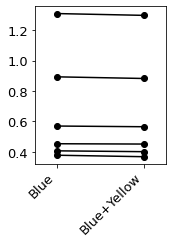

In [144]:
plt.figure(figsize=[2.5,3.5])
x = ['Blue','Blue+Yellow']
# x = [1,2]
ax = plt.subplot(111)
for i in range(6): #VC
# for i in range(6,14): #IC
    ax.plot(x,[B_data[i]*-1e9,Y_data[i]*-1e9],'k-o') #VC
#     ax.plot(x,[B_data[i]*-1e3,Y_data[i]*-1e3],'k-o') #IC
    ax.set_xlim(-0.25,1.25)
plt.xticks(rotation=45,ha='right')
# plt.ylabel('nA',size=14) #VC
# plt.ylabel('mV',size=14) #IC
plt.tick_params(labelsize=13)
plt.tight_layout()
# plt.savefig('/Users/zhengj10/Desktop/For ilya/220424/ChR2_IC_Blue+Yellow.pdf',format='pdf')
# plt.savefig('/Users/zhengj10/Desktop/For ilya/220424/ChR2_IC_Blue+Yellow.png',dpi=1200)
# plt.show()

In [125]:
len(B_data)

14

In [139]:
from scipy.stats import ttest_ind,ttest_rel


In [142]:
a = B_data[:6]
b = Y_data[:6]

# a = B_data[6:]
# b = Y_data[6:]

In [143]:
ttest_rel(a,b)

Ttest_relResult(statistic=-4.647709742804277, pvalue=0.005593658480533075)

In [ ]:
# P val
# VC 0.972
# IC 0.957

In [105]:
ax.get_xlim()

(-0.05, 1.05)

In [87]:
df_B_Y = pd.DataFrame()

In [ ]:
df_B_Y['Exp_type'] = Exp_type
df_B_Y['B_data'] = 

In [84]:
df.columns

Index(['Date', 'Plate', 'Mutation', 'Cell', 'Exp_type', 'Clamp_data',
       'Yellow_light_response', 'Blue_light_response',
       'Yellow_light_response_norm_to_blue_light', 'F0_bkg_rmd',
       'Yellow_light_response_norm_to_Cm_F0', 'Cm'],
      dtype='object')

In [ ]:
# df_p = df[df['Plate']=='plate_002']

In [ ]:
plt.figure(figsize=[4,4])
dataFile = glob(os.path.join(imgPath,date,plate,cell)+'/image_*.tif')
dataFile = dataFile[0]
data = imread(dataFile)
ax = plt.subplot(111)
ax.imshow(data,cmap='gray',vmax=2000)
ax.axis('off')
plt.tight_layout()
plt.savefig('/Users/zhengj10/Desktop/For ilya/IC_neuron_image.png')
plt.show()

In [ ]:
df[(df['Plate']=='plate_002')&(df['Cell']=='patch_attempt_0033_000')]